<a href="https://colab.research.google.com/github/NjoodJ/Training/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv('/Users/njoodwakeb/Downloads/NIPS Papers/papers.csv')
# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
273,1988,Training a 3-Node Neural Network is NP-Complete,Abstract Missing,494\n\nTRAINING A 3-NODE NEURAL NETWORK\nIS NP...
209,1996,Source Separation and Density Estimation by Fa...,Abstract Missing,Source Separation and Density\nEstimation by F...
2728,2008,Temporal Dynamics of Cognitive Control,Cognitive control refers to the flexible deplo...,Temporal Dynamics of Cognitive Control\n\nMich...
4522,2013,Dirty Statistical Models,We provide a unified framework for the high-di...,Dirty Statistical Models\nEunho Yang\nDepartme...
3608,2011,Autonomous Learning of Action Models for Planning,This paper introduces two new frameworks for l...,Autonomous Learning of Action Models for Plann...


In [ ]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

273     494\n\ntraining a 3-node neural network\nis np...
209     source separation and density\nestimation by f...
2728    temporal dynamics of cognitive control\n\nmich...
4522    dirty statistical models\neunho yang\ndepartme...
3608    autonomous learning of action models for plann...
Name: paper_text_processed, dtype: object

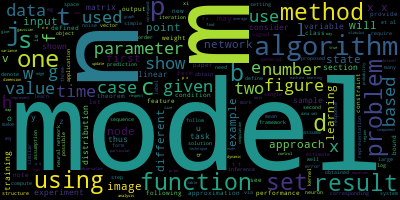

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=100000, contour_width=1, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:50])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/njoodwakeb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['training', 'node', 'neural', 'network', 'np', 'complete', 'avrim', 'blum', 'mit', 'lab', 'computer', 'science', 'cambridge', 'mass', 'usa', 'ronald', 'rivest', 'mit', 'lab', 'computer', 'science', 'cambridge', 'mass', 'usa', 'abstract', 'consider', 'layer', 'node', 'input', 'neural', 'network', 'whose', 'nodes', 'compute', 'linear', 'threshold', 'functions', 'inputs', 'show', 'np', 'complete', 'decide', 'whether', 'exist', 'weights', 'thresholds', 'three', 'nodes', 'network', 'produce']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 8), (12, 6), (13, 1), (14, 1), (15, 11), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 2), (25, 1), (26, 2), (27, 2), (28, 1), (29, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"model" + 0.005*"data" + 0.005*"function" + 0.005*"learning" + '
  '0.005*"set" + 0.005*"one" + 0.004*"given" + 0.004*"figure" + 0.004*"log" + '
  '0.004*"matrix"'),
 (1,
  '0.006*"model" + 0.005*"set" + 0.004*"figure" + 0.004*"time" + 0.004*"data" '
  '+ 0.004*"function" + 0.004*"number" + 0.004*"two" + 0.004*"one" + '
  '0.004*"learning"'),
 (2,
  '0.007*"model" + 0.006*"learning" + 0.005*"algorithm" + 0.005*"function" + '
  '0.004*"time" + 0.004*"one" + 0.004*"data" + 0.004*"set" + 0.004*"using" + '
  '0.003*"two"'),
 (3,
  '0.006*"function" + 0.005*"model" + 0.005*"set" + 0.004*"learning" + '
  '0.004*"time" + 0.004*"data" + 0.004*"two" + 0.004*"training" + '
  '0.003*"neural" + 0.003*"one"'),
 (4,
  '0.007*"model" + 0.006*"data" + 0.006*"learning" + 0.005*"algorithm" + '
  '0.005*"set" + 0.004*"problem" + 0.004*"function" + 0.004*"one" + '
  '0.004*"time" + 0.003*"training"'),
 (5,
  '0.006*"function" + 0.006*"model" + 0.005*"set" + 0.004*"learning" + '
  '0.004*"dat

In [ ]:
 pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pyLDAvis==3.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.2 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135618 sha256=dcd63a9d6472f9f585936ab06ba93f095d62ad071804120c0ddec6e91ac30bc3
  Stored in directory: /Users/njoodwakeb/Library/Caches/pip/wheels/b0/68/81/dfed2270e246ff0e9d1ce54c83969f615652ccd8242a339e44
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.0
    Uninstalling pyLDAvis-3.3.0:
      Successfully uninstalled pyLDAvis-3.3.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(str(num_topics))

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, str(num_topics) +'.html')
LDAvis_prepared

/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  'Category': 'Default'})
/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.vers

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.003219  0.001144       1        1  22.595912
1      0.002799  0.003541       2        1  13.328277
4     -0.009886  0.002533       3        1  12.637559
9     -0.004006 -0.006661       4        1  12.307157
2     -0.001242 -0.005231       5        1  11.768097
5      0.000244  0.007203       6        1   8.207452
3      0.008005 -0.002496       7        1   6.735916
6      0.000913 -0.002419       8        1   5.642503
8      0.004181  0.000404       9        1   3.431809
7      0.002211  0.001982      10        1   3.345317, topic_info=           Term         Freq        Total Category  logprob  loglift
183    function  1065.000000  1065.000000  Default  30.0000  30.0000
240    learning  1168.000000  1168.000000  Default  29.0000  29.0000
776       model  1311.000000  1311.000000  Default  28.0000  28.0000
11    algorithm   930.000000   930.000000  Default  27.0000  27.0000
480    training   607.000000   607.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
303         one    22.907254   867.922886  Topic10  -5.7985  -0.2370
451       state    16.343782   495.458225  Topic10  -6.1361  -0.0140
353     problem    19.445038   756.941447  Topic10  -5.9624  -0.2641
1985        log    17.071767   634.469980  Topic10  -6.0926  -0.2178
1433     models    15.683541   607.190458  Topic10  -6.1774  -0.2586

[863 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2955      1  0.124820  accelerated
2955      2  0.083213  accelerated
2955      3  0.124820  accelerated
2955      4  0.166427  accelerated
2955      5  0.124820  accelerated
...     ...       ...          ...
3440      6  0.102687           zt
3440      7  0.082150           zt
3440      8  0.041075           zt
3440      9  0.082150           zt
3440     10  0.020537           zt

[3883 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 10, 3, 6, 4, 7, 9, 8])